In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import numpy as np
import torchvision
from torchvision import *
from torch.utils.data import Dataset, DataLoader
from tensorflow.keras.preprocessing.image import load_img
import glob
import matplotlib.pyplot as plt
import time
import copy
import os
import PIL.Image as Image
import pandas as pd
classes = ['freckles', 'non']

In [18]:
#device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
net = models.resnet18(pretrained=True)
#net = net.cuda() if device else net
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.0001, momentum=0.9)
num_ftrs = net.fc.in_features
net.fc = nn.Linear(num_ftrs, 128)
#net.fc = net.fc.cuda() 
net.load_state_dict(torch.load('resnet.pt'))
image_transforms = transforms.Compose([
    transforms.Resize((512, 512)) ,
    transforms.ToTensor(),
    #transforms.Normalize(torch.Tensor(mean), torch.Tensor(std))
])

def classify(model, image_transforms, image_path, classes) :
    model.eval()
    image = Image.open(image_path)
    image = image_transforms(image)
    image = image.unsqueeze(0)
    output = model(image)
    _, predicted = torch.max(output.data, 1)
    print(classes[predicted.item()])
classify(net, image_transforms, 'data/test/face0.png', classes)

non


In [3]:
#device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
net = models.resnet18(pretrained=True)
#net = net.cuda() if device else net
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.0001, momentum=0.9)
num_ftrs = net.fc.in_features
net.fc = nn.Linear(num_ftrs, 128)
#net.fc = net.fc.cuda() 
net.load_state_dict(torch.load('resnet.pt'))
image_transforms = transforms.Compose([
    transforms.Resize((512, 512)) ,
    transforms.ToTensor(),
    #transforms.Normalize(torch.Tensor(mean), torch.Tensor(std))
])

def classify(model, image_transforms, images_path, classes) :
    model.eval()
    image = Image.open(images_path)
    image = image_transforms(image)
    image = image.unsqueeze(0)
    output = model(image)
    _, predicted = torch.max(output.data, 1)
    return classes[predicted.item()]

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

In [8]:
images_path=glob.glob('data/test/*.jpg')

In [9]:
pred_dict={}

for i in images_path:
    pred_dict[i[i.rfind('/')+1:]] = classify(net, image_transforms, i, classes)

In [10]:
df = pd.DataFrame()
df['name'] = pred_dict.keys()
df['class'] = pred_dict.values()

In [11]:
df

,name,class
0,crop_image27.jpg,freckles
1,crop_image3.jpg,freckles
2,crop_image30.jpg,freckles
3,crop_image28.jpg,freckles
4,crop_image25.jpg,freckles
...,...,...
71,crop_image91.jpg,freckles
72,crop_image90.jpg,freckles
73,crop_image86.jpg,freckles
74,crop_image87.jpg,freckles


ValueError: ignored

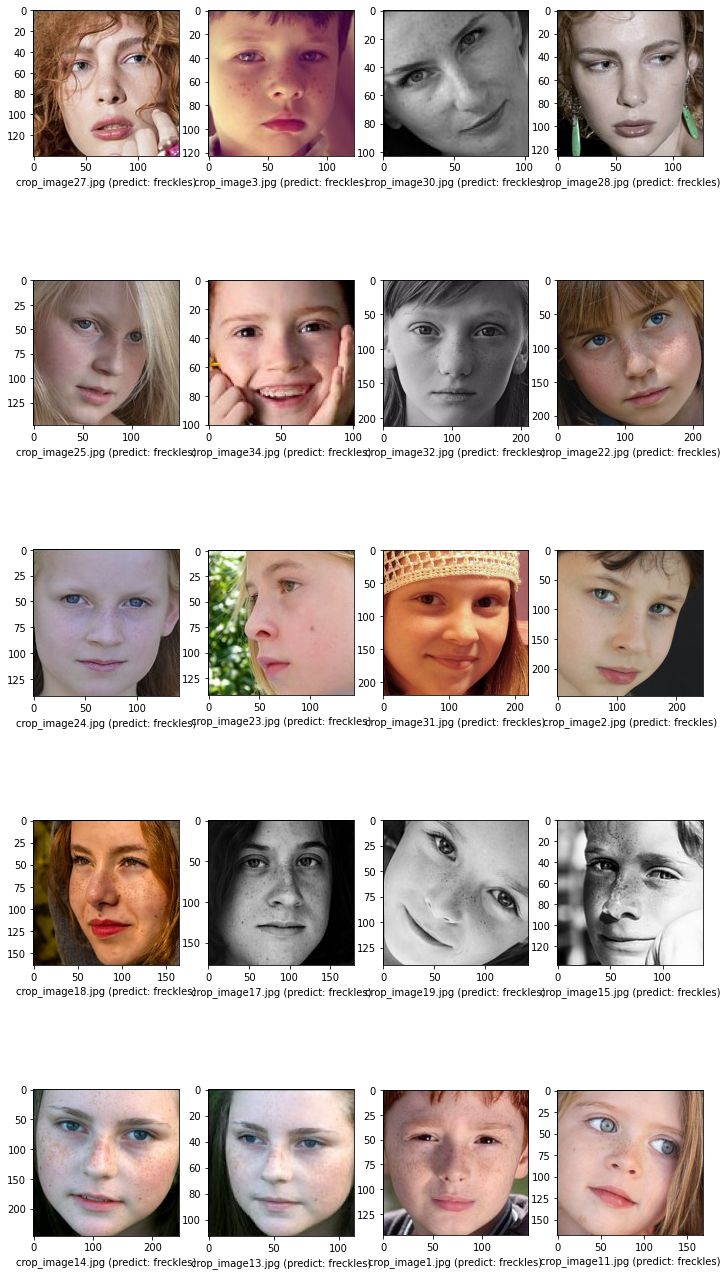

In [14]:
plt.figure(figsize=(12, 24))
for index, row in df.iterrows():
    filename = row['name']
    pred = row['class']
    img = load_img('data/test/' + filename)
    plt.subplot(5,4, index+1)
    plt.imshow(img)
    plt.xlabel(filename + ' (predict: ' + "{}".format(pred) + ')' )
plt.tight_layout()
plt.show()